These data were taken with the stage temperature regulating at about 400 mK and IR LED on during the stream.

The diode current bias was accidentally shorted, and the voltage was probably too low.

In [1]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 300

In [2]:
from collections import defaultdict

In [3]:
from kid_readout.measurement.io import npy
from kid_readout.measurement import plot_basic
from kid_readout.analysis.resonator import plot_resonator, lmfit_models, lmfit_resonator

In [4]:
npd = npy.NumpyDirectory('/data/detectors/2017-02-17_152548_led.npd/')

In [5]:
npd.node_names()

['SingleSweep0', 'SingleSweepStream1', 'ADCSnap2']

In [6]:
swp = npd.SingleSweep0
sss = npd.SingleSweepStream1
snap = npd.ADCSnap2

# Tone centering

In [8]:
sss.stream.tone_offset_frequency()

array([ 0.])

# Forward scattering versus frequency

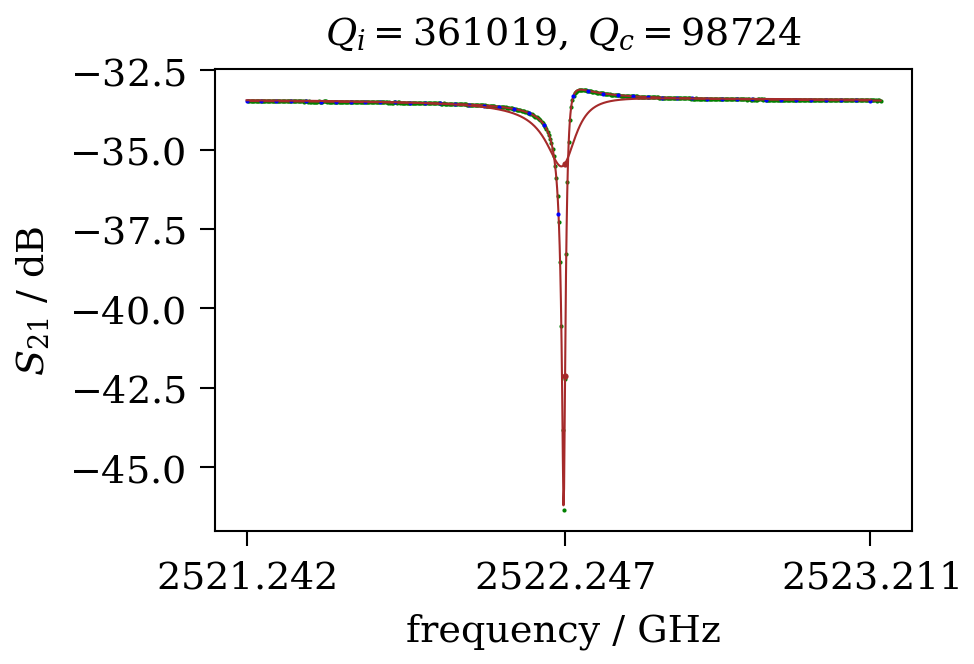

In [11]:
fig, ax = plt.subplots()
ax.set_xlabel('frequency / GHz')
ax.set_ylabel('$S_{21}$ / dB')
plot_resonator.amplitude(ax, sss.resonator, data_color='green')
plot_resonator.amplitude(ax, swp.resonator)
ax.set_title(r'$Q_i = {:.0f}, \; Q_c = {:.0f}$'.format(sss.resonator.Q_i, sss.resonator.Q_e_real))

In [24]:
sss.stream.sample_time.size

2097152

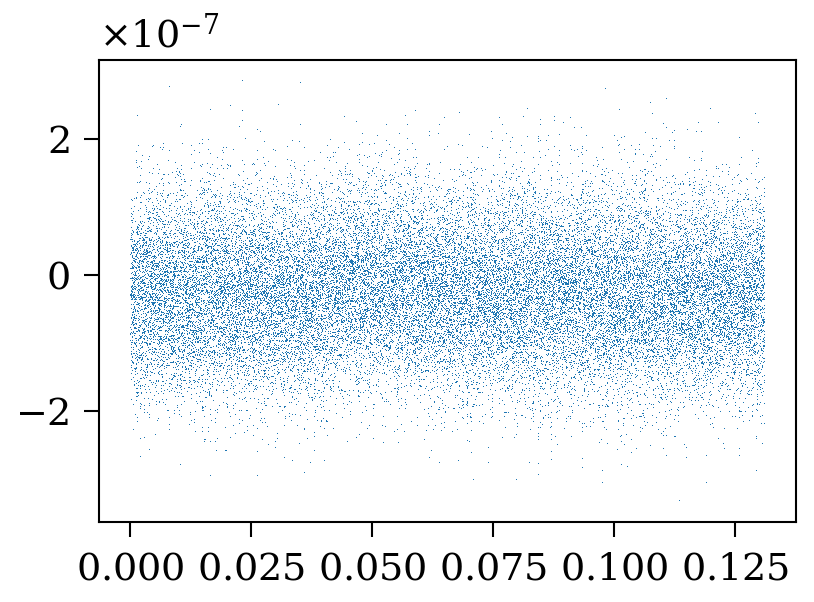

In [26]:
start_index = 0
end_index = 2**15
fig, ax = plt.subplots()
ax.plot(sss.stream.sample_time[start_index:end_index],
        sss.x[start_index:end_index], ',')

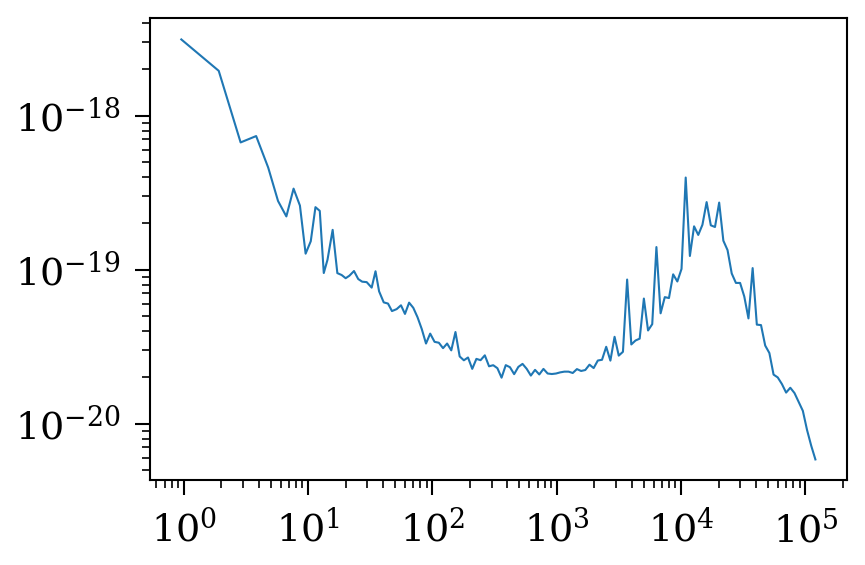

In [27]:
fig, ax = plt.subplots()
ax.loglog(sss.S_frequency, sss.S_xx)